An estimate of pi from simulation.

# Simulate pairs of uniform random numbers ~U(0,1)

In [1]:
# import libaries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
# set to plot automatically
%matplotlib inline
# set font size of charts
sns.set(font_scale=2)

In [2]:
# set number of pairs to simulate
n=5000

In [3]:
# set numpy random state so repeatable results
np.random.seed(42)
# generate pairs of random values, where x~U(0,1), and y~U(0,1).
random_points = np.random.uniform(-1,1,size=(n,2))

# Plot points inside and outside unit circle

In [4]:
# create a mask for data points inside the unit circle x^2 + y^2 = 1
mask = np.sum(random_points**2,axis=1)<=1

In [5]:
# create arrays for points inside and outside of unit circle
inside = random_points[mask]
outside = random_points[~mask]

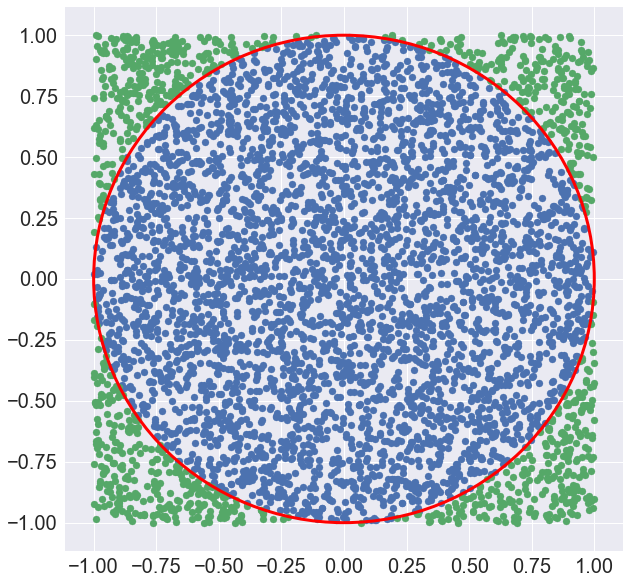

In [6]:
# create figure
fig = plt.figure(figsize=(10, 10));
ax = fig.add_subplot(1, 1, 1)
# plot points
ax.scatter(inside[:,0],inside[:,1]);
ax.scatter(outside[:,0],outside[:,1]);
# plot unit circle
circ = plt.Circle((0, 0), radius=1, edgecolor='r', facecolor='None',lw=3);
ax.add_patch(circ);

# Estimate area and pi

In [7]:
# estimate area of circle = proportion of points in unit square
area = sum(mask)/n
print('Estimated area of unit circle:',area)

Estimated area of unit circle: 0.79


In [8]:
# estimate pi from formula area = (pi)*(r**2)
pi_estimate = area/(0.5**2)
print('Estimated value for pi:',pi_estimate)

Estimated value for pi: 3.16


# Vizualise how pi estimate changes with sample size

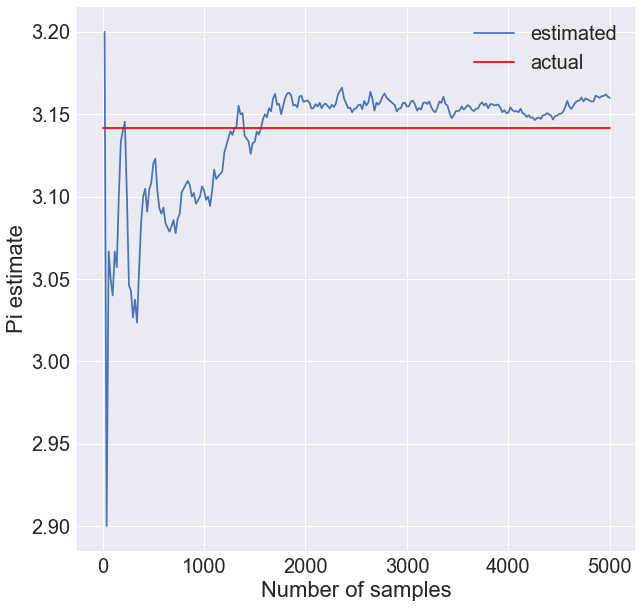

In [9]:
# visualize how estimate changes with more samples
pi_list = []
x_list = []
# loop through samples each time considering 20 more points
# so first takes points 0-20, second 0-40, third 0-60
for i in list(range(20, n+1,20)):
    # calculate the area
    area = sum(mask[0:i])/i
    # calculate estimate of pi
    pi_estimate = area/(0.5**2)
    # append pi estimate and xs to list
    pi_list.append(pi_estimate)
    x_list.append(i)

fig = plt.figure(figsize=(10, 10));
plt.plot(x_list,pi_list, label='estimated');
plt.plot([0, n], [pi, pi], "r-", label='actual');
plt.xlabel('Number of samples');
plt.ylabel('Pi estimate');
plt.legend();